In [3]:
!pip3 install requests

    100% |████████████████████████████████| 61kB 666kB/s ta 0:00:011
    100% |████████████████████████████████| 143kB 2.7MB/s ta 0:00:01
    100% |████████████████████████████████| 163kB 1.3MB/s ta 0:00:01
    100% |████████████████████████████████| 133kB 1.7MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 599kB/s ta 0:00:011


In [1]:
from bs4 import BeautifulSoup
import requests
import string
import time
import random

In [47]:
for pnct in exclude:
    if pnct in "do/":
        print("heral")

heral


In [86]:
'as HHH sasAHH '.lower().strip()

'as hhh sasahh'

In [2]:
url = "https://ru.speaklanguages.com/%D0%B0%D0%BD%D0%B3%D0%BB%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9/%D0%BB%D0%B5%D0%BA%D1%81%D0%B8%D0%BA%D0%B0/%D1%81%D1%82%D1%80%D0%B0%D0%BD%D1%8B-%D0%B8-%D0%BD%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D1%81%D1%82%D0%B8"
r = requests.get(url)

In [20]:
lst = []
soup = BeautifulSoup(r.content, 'html.parser')
for el in soup.find_all("a",{'lang':'en'}):
    if(len(el.text.split()) == 1):
        lst.append(el.text)

In [76]:
url = "https://vk.com/lingualeo"
r = requests.get(url)
soup = BeautifulSoup("leo_vk.htm⁩", 'html.parser')
soup

leo_vk.htm⁩

In [84]:
with open("leo_vk.htm", "r",encoding = "ISO-8859-1") as f:
    contents = f.read()
    soup = BeautifulSoup(contents, 'html.parser')
    for el in soup.find_all("div",{'class':'wall_reply_text'}):
        print(el.text)

Shall
Sunday
September
Service
Shape
Small
Sand
Secret
Salary
School
Science
Search
Secret
Sweet
Saint
Salt
Sea
Sweet
Surprise
Seldom
Sword
Symmetrical
Shadow
ß èçìåíèë ïåðåâîä ñëîâà, íî â òðåíèðîâêàõ ó íåãî ïîñòîÿííî õðåíîâûé ïåðåâîä. Âû ýòî ñîáèðàåòåñü èñïðàâëÿòü?
Ìîæíî ðîñïèñü? https://vk.com/wall540289893_7
Ñîáèðàëàñü êóïèòü ïîäïèñêó, íî çà òàêèå öåíû íå âîçüìó.. Ïîêà Ëåî!
Ðàíüøå çà 270-350 ðóáëåé ïîêóïàë ñî ñêèäêîé. Â øîêå îò íîâûõ öåí, èíäåêñàöèÿ è âñå òàêîå, íî íå äî òàêîé ñòåïåíè. Çàòî ïî ôóíêöèîíàëó ïðîãðàììà îñîáî ñèëüíî íå èçìåíèëàñü.
Ãîäîâàÿ óæå äî 4 òûñ âûðîñëà? 0_î
I always have kanak attack.
Äà óæ, êîìàíäà Ëåî :) íå çíàþ êòî òàì ó âàñ ñòàë ðóëèòü ïðîöåññàìè èëè çàíèìàåòñÿ ìàðêåòèíãîì íî ãîíèòå åãî â øåþ. Íó èëè êîãäà òåêóùèå ïîäïèñêè ïîçàêàí÷èâàþòñÿ à íîâûõ íå áóäåò, íî òîãäà óæå áóäåò ïîçäíî. À òàê - óäà÷è, ñ òàêèì "Ìàðêåòèíãîì" ÿ äàæå çà ñêèäêó â 95% ïðîäëåâàòü íå áóäó ãîäîâóþ ïîäïèñêó
Îíà ïîëíà áîáîâ
Ó êîìàíäû Ëåî âåñåííåå îáîñòðåíèå, òàêèå öåíû ëîìèòü? Öåíà, ïðè êîòî

In [81]:
for el in soup.find_all("a",{'lang':'en'}):
        print(el)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">

<!-- saved from url=(0024)https://vk.com/lingualeo -->
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://ogp.me/ns#"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="https://vk.com/images/icons/favicons/fav_logo.ico?6" rel="shortcut icon"/>
<link href="https://vk.com/images/safari_60.png?1" rel="apple-touch-icon"/>
<link href="https://vk.com/images/safari_76.png?1" rel="apple-touch-icon" sizes="76x76"/>
<link href="https://vk.com/images/safari_120.png?1" rel="apple-touch-icon" sizes="120x120"/>
<link href="https://vk.com/images/safari_152.png?1" rel="apple-touch-icon" sizes="152x152"/>
<meta content="Lingualeo.com - ëó÷øèé ñïîñîá èçó÷àòü è ïðàêòèêîâàòü àíãëèéñêèé ÿçûê îíëàéí. Ñ íàìè óæå çàíèìàþòñÿ 18 ìèëëèîíîâ ÷åëîâåê ïî âñåìó ìèðó." name="description"

In [18]:
ex = 'OK'
exclude = set(string.punctuation)
def preprocess (line):
    final_split = []
    punct_in_line = False
    for pnct in exclude:
        if pnct in line:
            punct_in_line = True
            
    if not punct_in_line:
        #print("GOOD LINE",line )
        final_split.append(line.lower().strip())
    
    for ex_el in line.split():
        fin_elements = ex_el.split('/')
        fin_elements = [''.join(ch for ch in el if ch not in exclude) for el in fin_elements]
        #fin_elements = [el.replace('...', '') for el in fin_elements]
        fin_elements = [el.lower() for el in fin_elements]
        #print("fin",fin_elements)
        final_split.extend(fin_elements)
    try:
        final_split.remove("etc.")
    except:
        pass
    return final_split
preprocess(ex)

['ok', 'ok']

In [16]:
url = 'http://vocabulary.englishprofile.org/dictionary/search/uk/?c=302&c=302&pageSize=100&q=&wl=302&p=1'
payload = {'inUserName': 'englishprofile', 'inUserPass': 'vocabulary'}
r = requests.get(url, data=payload, auth=('englishprofile','vocabulary'))
soup = BeautifulSoup(r.content, 'html.parser')
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<title> - Search results from the English Vocabulary Profile</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content=" from the Cambridge English Vocabulary Profile." name="description"/>
<meta content=", english, dictionary, dictionaries, Cambridge free, american, definition, word, expression, phrase, example, phrasal verb, contemporary, elementary, intermediate, word search" name="keywords"/>
<link href="/external/styles/interface.css" rel="stylesheet" type="text/css"/>
<link href="/external/styles/search_results.css" rel="stylesheet" type="text/css"/>
<link href="/external/styles/print.css" media="print" rel="stylesheet" type="text/css"/>
<link href="/external/images/favicon.png" rel="icon" type="image/png"/>
</head>
<body>
<div class="banner"><a href="/"><img alt="English Voca

In [12]:
def get_words(basic_url, hundred_pages_count):
    current_time = time.time()
    vocabulary = []
    for page_index in range(1,hundred_pages_count + 1):
        time.sleep(0.5 + random.randint(1,2))
        url = basic_url + str(page_index)
        print("Now handling", url)
        r = requests.get(url, data=payload, auth=('englishprofile','vocabulary'))
        soup = BeautifulSoup(r.content, 'html.parser')
        for el in soup.find_all("span",{'class':'base'}):
            line = el.text
            #print(line)
            split_line = preprocess(line)
            #print(split_line)
            vocabulary.extend(split_line)
        print("collected words count =", len(vocabulary))

        elapsed_time = time.time() - current_time
        print("elapsed", elapsed_time)
        current_time = time.time()
    vocabulary = set(vocabulary)
    return vocabulary

In [88]:
url_A1 = "http://vocabulary.englishprofile.org/dictionary/search/uk/?c=301&pageSize=100&q=&wl=301&p="
A1_vocab = get_words(url_A1, 8)

Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=301&pageSize=100&q=&wl=301&p=1
collected words count = 211
elapsed 8.524831771850586
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=301&pageSize=100&q=&wl=301&p=2
collected words count = 424
elapsed 9.938145160675049
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=301&pageSize=100&q=&wl=301&p=3
collected words count = 644
elapsed 8.506877899169922
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=301&pageSize=100&q=&wl=301&p=4
collected words count = 870
elapsed 11.986361742019653
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=301&pageSize=100&q=&wl=301&p=5
collected words count = 1087
elapsed 11.993330955505371
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=301&pageSize=100&q=&wl=301&p=6
collected words count = 1301
elapsed 12.483668088912964
Now handling http://vocabulary.englishpro

In [95]:
with open("A1_vocab_processed.txt", "w") as file:
    for word in A1_vocab:
        if (word):
            file.write(word + '\n')

In [89]:
A2_vocab = get_words(url_A2, 16)

Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=302&c=302&pageSize=100&q=&wl=302&p=1
collected words count = 231
elapsed 11.911826848983765
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=302&c=302&pageSize=100&q=&wl=302&p=2
collected words count = 468
elapsed 13.862512826919556
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=302&c=302&pageSize=100&q=&wl=302&p=3
collected words count = 687
elapsed 11.303346872329712
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=302&c=302&pageSize=100&q=&wl=302&p=4
collected words count = 901
elapsed 13.931840896606445
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=302&c=302&pageSize=100&q=&wl=302&p=5
collected words count = 1126
elapsed 9.92702603340149
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=302&c=302&pageSize=100&q=&wl=302&p=6
collected words count = 1372
elapsed 13.398828983306885
Now 

In [97]:
len(A2_vocab)
A2_vocab -= A1_vocab
len(A2_vocab)

1038

In [103]:
A2_vocab -= A1_vocab
with open("A2_vocab_processed.txt", "w") as file:
    for word in A2_vocab:
        if (word):
            file.write(word + '\n')

In [117]:
'adventure' in A2_vocab

True

In [20]:
url_B1 = "http://vocabulary.englishprofile.org/dictionary/search/uk/?c=303&pageSize=100&q=&wl=303&p="
B1_vocab = get_words(url_B1, 20)

Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=303&pageSize=100&q=&wl=303&p=1
collected words count = 246
elapsed 6.153162956237793
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=303&pageSize=100&q=&wl=303&p=2
collected words count = 479
elapsed 6.9743242263793945
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=303&pageSize=100&q=&wl=303&p=3
collected words count = 734
elapsed 5.828500986099243
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=303&pageSize=100&q=&wl=303&p=4
collected words count = 986
elapsed 7.0409932136535645
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=303&pageSize=100&q=&wl=303&p=5
collected words count = 1213
elapsed 6.104832887649536
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=303&pageSize=100&q=&wl=303&p=6
collected words count = 1424
elapsed 6.870722770690918
Now handling http://vocabulary.englishprof

In [21]:
'report' in B1_vocab

False

In [122]:
print(len(B1_vocab))
B1_vocab -= A1_vocab
B1_vocab -= A2_vocab
print(len(B1_vocab))
with open("B1_vocab_processed.txt", "w") as file:
    for word in B1_vocab:
        if(word):
            file.write(word + '\n')

1240
1240


In [112]:
B1_vocab

{'after all',
 'ferry',
 'general',
 'knickers',
 'beautifully',
 'charity',
 'you know',
 'a little sth',
 'efficient',
 'divide',
 'explore',
 'make a face',
 'marry',
 'brief',
 'nasty',
 'extremely',
 'go wrong',
 'neat',
 'definite',
 'common sense',
 'bet',
 'pharmacy',
 'natural',
 'the other day',
 'prayer',
 'go up',
 'angel',
 'accent',
 'orchestra',
 'air force',
 'dislike',
 'middleaged',
 'attack',
 'amount',
 'percent',
 'prepared',
 'freezing',
 'if i were you',
 'average',
 'flag',
 'get on',
 'frog',
 'pea',
 'call for sb',
 'musician',
 'goat',
 'owner',
 'bleed',
 'afford',
 'hand out sth or hand sth out',
 'cleaned',
 'definite article',
 'engineering',
 'grill',
 'owe',
 'edge',
 'awful',
 'burning',
 'hardly',
 'bandage',
 'injure',
 'greeting',
 'embarrassing',
 'explanation',
 'obvious',
 'advert',
 'cushion',
 'local',
 'elderly',
 'murder',
 'depend',
 '3',
 'install',
 'attempt',
 'disc',
 'infinitive',
 'announce',
 'grant',
 'weeks',
 'angrily',
 'experimen

In [91]:
url_B2 = "http://vocabulary.englishprofile.org/dictionary/search/uk/?c=304&pageSize=100&q=&wl=304&p="
B2_vocab = get_words(url_B2, 20)

Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=304&pageSize=100&q=&wl=304&p=1
collected words count = 234
elapsed 19.03434991836548
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=304&pageSize=100&q=&wl=304&p=2
collected words count = 483
elapsed 23.99513292312622
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=304&pageSize=100&q=&wl=304&p=3
collected words count = 740
elapsed 15.23379111289978
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=304&pageSize=100&q=&wl=304&p=4
collected words count = 1010
elapsed 17.45060110092163
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=304&pageSize=100&q=&wl=304&p=5
collected words count = 1307
elapsed 20.669897317886353
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=304&pageSize=100&q=&wl=304&p=6
collected words count = 1571
elapsed 16.979345083236694
Now handling http://vocabulary.englishpro

In [118]:
'abandon' in B2_vocab

True

In [121]:
print(len(B2_vocab))
B2_vocab -= A1_vocab
B2_vocab -= A2_vocab
B2_vocab -= B1_vocab
print(len(B2_vocab))
with open("B2_vocab_processed.txt", "w") as file:
    for word in B2_vocab:
        file.write(word + '\n')

1191
1191


In [92]:
url_C1 = "http://vocabulary.englishprofile.org/dictionary/search/uk/?c=305&pageSize=100&q=&wl=305&p="
C1_vocab = get_words(url_C1, 19)

Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=305&pageSize=100&q=&wl=305&p=1
collected words count = 245
elapsed 11.053164005279541
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=305&pageSize=100&q=&wl=305&p=2
collected words count = 525
elapsed 11.194352865219116
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=305&pageSize=100&q=&wl=305&p=3
collected words count = 860
elapsed 11.465772151947021
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=305&pageSize=100&q=&wl=305&p=4
collected words count = 1118
elapsed 10.557591915130615
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=305&pageSize=100&q=&wl=305&p=5
collected words count = 1396
elapsed 13.439781904220581
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=305&pageSize=100&q=&wl=305&p=6
collected words count = 1647
elapsed 14.3975350856781
Now handling http://vocabulary.englishp

In [93]:
url_C2 = "http://vocabulary.englishprofile.org/dictionary/search/uk/?c=306&pageSize=100&q=&wl=306&p="
C2_vocab = get_words(url_C2, 19)

Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=306&pageSize=100&q=&wl=306&p=1
collected words count = 282
elapsed 14.03484320640564
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=306&pageSize=100&q=&wl=306&p=2
collected words count = 655
elapsed 11.764477014541626
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=306&pageSize=100&q=&wl=306&p=3
collected words count = 990
elapsed 12.668713808059692
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=306&pageSize=100&q=&wl=306&p=4
collected words count = 1333
elapsed 11.889029026031494
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=306&pageSize=100&q=&wl=306&p=5
collected words count = 1612
elapsed 10.07736611366272
Now handling http://vocabulary.englishprofile.org/dictionary/search/uk/?c=306&pageSize=100&q=&wl=306&p=6
collected words count = 1899
elapsed 10.522958040237427
Now handling http://vocabulary.englishp

In [115]:
'neverending' in c_vocab

True

In [116]:
len(c_vocab)

2460

In [123]:
c_vocab = C1_vocab.union(C2_vocab)
print(len(c_vocab))
c_vocab -= A1_vocab
c_vocab -= A2_vocab
c_vocab -= B1_vocab
c_vocab -= B2_vocab
print(len(c_vocab))
with open("C_vocab_processed.txt", "w") as file:
    for word in c_vocab:
        file.write(word + '\n')

3558
2460


In [124]:
'nation' in c_vocab

False

In [39]:
current_time = time.time()
vocabulary = []
for page_index in range(1,17):
    time.sleep(10 + random.randint(1,10))
    r = requests.get(url, data=payload, auth=('englishprofile','vocabulary'))
    soup = BeautifulSoup(r.content, 'html.parser')
    #print(voc_file)
    for el in soup.find_all("span",{'class':'base'}):
        line = el.text
        #print(line)
        split_line = preprocess(line)
        #print(split_line)
        vocabulary.extend(split_line)
        
    elapsed_time = time.time() - current_time
    print("elapsed", elapsed_time)
    current_time = time.time()
vocabulary = set(vocabulary)

elapsed 22.054046869277954
elapsed 25.36836814880371


KeyboardInterrupt: 

In [ ]:
(len(vocabulary), vocabulary[:10])

In [15]:
soup = BeautifulSoup(r.content, 'html.parser')
soup

<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">

<html><head>
<title>401 Authorization Required</title>
</head><body>
<h1>Authorization Required</h1>
<p>This server could not verify that you
are authorized to access the document
requested.  Either you supplied the wrong
credentials (e.g., bad password), or your
browser doesn't understand how to supply
the credentials required.</p>
<hr/>
<address>Apache/2.2.3 (Red Hat) Server at vocabulary.englishprofile.org Port 80</address>
</body></html>

In [18]:
!pip3 install selenium

    100% |████████████████████████████████| 911kB 6.4MB/s ta 0:00:01


In [17]:
with requests.Session() as s:
    p = s.post(url, data=payload)
    # print the html returned or something more intelligent to see if it's a successful login page.
    print (p.text)

    # An authorised request.
    r = s.get(url)
    print (r.text)

<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">
<html><head>
<title>401 Authorization Required</title>
</head><body>
<h1>Authorization Required</h1>
<p>This server could not verify that you
are authorized to access the document
requested.  Either you supplied the wrong
credentials (e.g., bad password), or your
browser doesn't understand how to supply
the credentials required.</p>
<hr>
<address>Apache/2.2.3 (Red Hat) Server at vocabulary.englishprofile.org Port 80</address>
</body></html>

<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">
<html><head>
<title>401 Authorization Required</title>
</head><body>
<h1>Authorization Required</h1>
<p>This server could not verify that you
are authorized to access the document
requested.  Either you supplied the wrong
credentials (e.g., bad password), or your
browser doesn't understand how to supply
the credentials required.</p>
<hr>
<address>Apache/2.2.3 (Red Hat) Server at vocabulary.englishprofile.org Port 80</address>
</body></html>



In [8]:
import operator
x = {1: 2, 3: 4, 4: 3, 2: 1, 0: 0}
sorted_x = sorted(x.items(), key=operator.itemgetter(1),reverse = True)

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

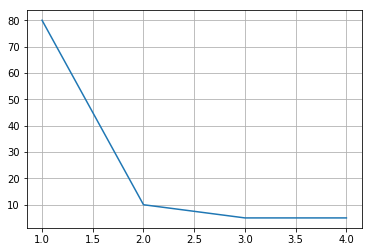

In [35]:
plt.plot(x,y)
plt.grid(True)
plt.show()

In [109]:
[20] * 0

[]

In [108]:
a1 = [20] * 20
a2 = [40] * 10
b1 = [60] * 10
b2 = [80] * 15
c = [100] * 45
all_words = []
all_words.extend(b2)
all_words.extend(a1)
all_words.extend(a2)
all_words.extend(b1)

all_words.extend(c)
print(len(all_words))
print(np.median(all_words))
print(np.percentile(all_words, 75))

100
80.0
100.0


[30, 20, 20, 10, 20] [1, 2, 3, 4, 5]
70.0


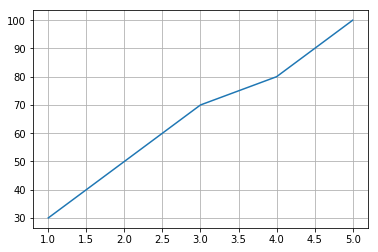

In [90]:
x = [1,2,3,4,5]
y = [30,20,20,10,20]
arr = [x,y]
np.median(y)
cum_y = np.cumsum(y)
print(y, x)
print(np.percentile(cum_y, 50))
plt.plot(x,cum_y)
plt.grid(True)
plt.show()

31.25

array([ 80,  90,  95, 100])

In [34]:
# median along the axis = 0  
print("\nmedian of arr, axis = 0 : ", np.median(arr, axis = 0))  
   
# median along the axis = 1  
print("\nmedian of arr, axis = 1 : ", np.median(arr, axis = 1))


median of arr, axis = 0 :  [40.5  6.   4.   4.5]

median of arr, axis = 1 :  [2.5 7.5]


NameError: name 'mu' is not defined

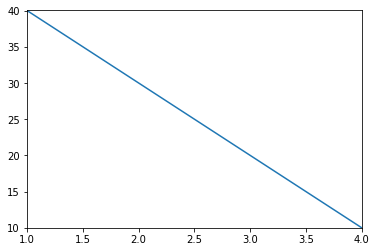

In [29]:
fig, ax = plt.subplots()
ax.plot(x, y)

ax.set_xlim([min(x), max(x)])
ax.set_ylim([min(y), max(y)+0.02])

ax.hlines(y=max(y), xmin=min(x), xmax=mu, color='r')
ax.vlines(x=mu, ymin=min(y), ymax=max(y), color='r')

plt.show()

In [9]:
for i in sorted_x:
    print (i)

(3, 4)
(4, 3)
(1, 2)
(2, 1)
(0, 0)


In [11]:
sorted_x[0][0]

3